<a href="https://colab.research.google.com/github/khusheedhanuka/machine_learning/blob/main/DBSCAN_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-6-cd11785d3127>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=30, edgecolors='k', cmap='viridis')


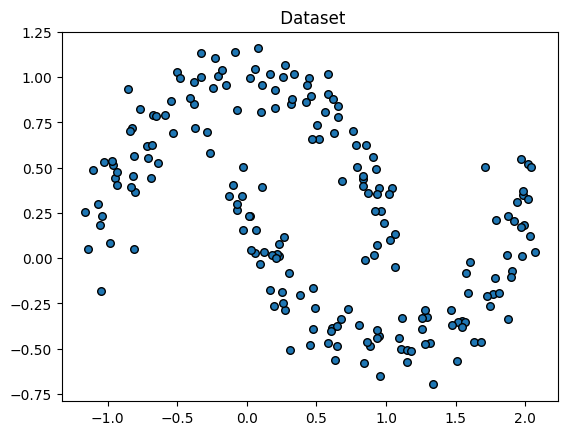

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt


X, y = make_moons(n_samples=200, noise=0.1, random_state=0)


plt.scatter(X[:, 0], X[:, 1], s=30, edgecolors='k', cmap='viridis')
plt.title(" Dataset")
plt.show()

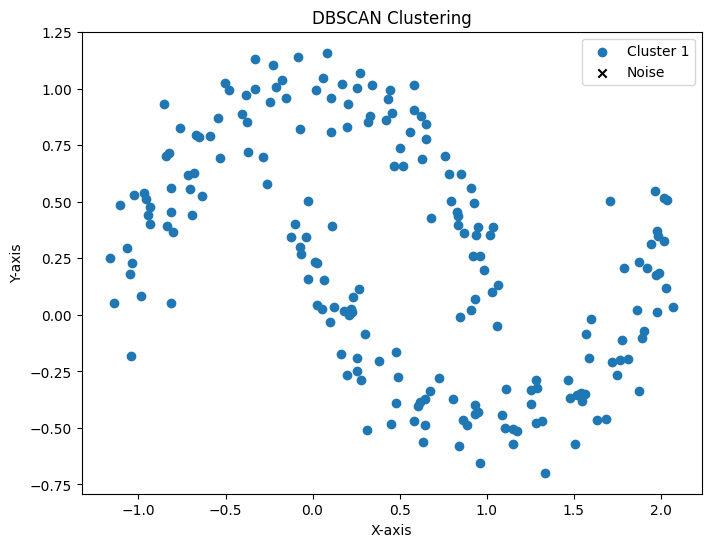

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class DBSCANn:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples
        self.visited = set()
        self.clusters = []

    def _euclidean_distance(self, point1, point2):
        return np.linalg.norm(point1 - point2)

    def _range_query(self, data, center):
        return [i for i, point in enumerate(data) if self._euclidean_distance(center, point) <= self.eps]

    def _expand_cluster(self, data, cluster, point_idx, neighbors):
        cluster.append(point_idx)
        self.visited.add(point_idx)

        for neighbor in neighbors:
            if neighbor not in self.visited:
                self.visited.add(neighbor)
                new_neighbors = self._range_query(data, data[neighbor])

                if len(new_neighbors) >= self.min_samples:
                    neighbors.extend(new_neighbors)

                if neighbor not in [p for c in self.clusters for p in c]:
                    cluster.append(neighbor)

    def fit(self, data):
        self.visited = set()
        self.clusters = []

        for i, point in enumerate(data):
            if i not in self.visited:
                neighbors = self._range_query(data, point)

                if len(neighbors) >= self.min_samples:
                    new_cluster = []
                    self._expand_cluster(data, new_cluster, i, neighbors)

                    if len(new_cluster) >= self.min_samples:
                        self.clusters.append(new_cluster)

    def predict(self, data):
        labels = np.full(len(data), -1, dtype=int)

        for cluster_idx, cluster in enumerate(self.clusters):
            labels[cluster] = cluster_idx

        return labels

    def plot_clusters(self, data):
        plt.figure(figsize=(8, 6))

        for cluster_idx, cluster in enumerate(self.clusters):
            cluster_points = data[cluster]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_idx + 1}')

        noise_points = data[[i for i in range(len(data)) if i not in [p for c in self.clusters for p in c]]]
        plt.scatter(noise_points[:, 0], noise_points[:, 1], color='black', marker='x', label='Noise')

        plt.title('DBSCAN Clustering')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.legend()
        plt.show()




dbscan = DBSCANn(eps=0.3, min_samples=5)
dbscan.fit(X)
labels = dbscan.predict(X)
dbscan.plot_clusters(X)

In [ ]:
X

array([[ 7.92357355e-01,  5.02648573e-01],
       [ 1.63158315e+00, -4.63896705e-01],
       [-6.71092674e-02,  2.67767057e-01],
       [-1.04412427e+00, -1.82607610e-01],
       [ 1.76704822e+00, -1.98609868e-01],
       [ 1.90607398e+00, -7.10915927e-02],
       [ 9.62192129e-01,  2.61986075e-01],
       [ 8.86813848e-01, -4.84896235e-01],
       [ 8.68935196e-01,  3.61092776e-01],
       [ 1.15352953e+00, -5.72352929e-01],
       [-3.70714493e-01,  7.21655833e-01],
       [ 1.95523229e-01, -2.64439358e-01],
       [ 1.80949658e+00, -1.94707885e-01],
       [ 1.29046617e+00, -3.23893778e-01],
       [-8.23662620e-01,  7.17643700e-01],
       [ 9.85881879e-01,  1.96706218e-01],
       [ 5.81943503e-01,  9.06311048e-01],
       [ 2.76118902e-01, -2.87451069e-01],
       [ 3.17284813e-01,  8.54200996e-01],
       [-8.52697952e-01,  9.32383274e-01],
       [ 1.97796688e+00,  1.04796611e-02],
       [ 8.64249290e-01, -4.63242870e-01],
       [ 2.57499053e-01,  1.00362573e+00],
       [ 1.

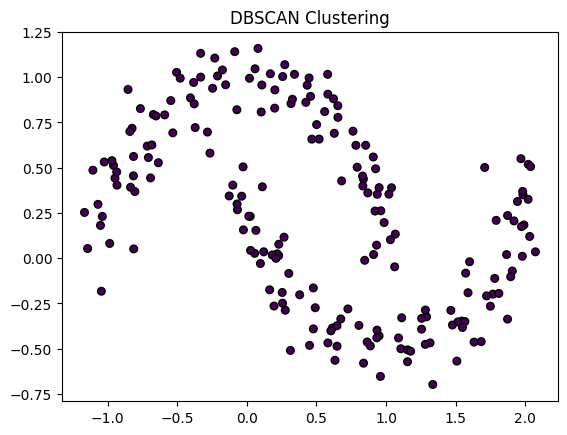

In [ ]:
from sklearn.cluster import DBSCAN
X, _ = make_moons(n_samples=200, noise=0.1, random_state=0)

dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)


plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, edgecolors='k')
plt.title("DBSCAN Clustering")
plt.show()